<a href="https://colab.research.google.com/github/LilianYou/dark-lily/blob/master/4_fcn_single_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSYCH 239: Week 2: Fully Connected Neural Network for Visual Classification


In [0]:
import torch
from torchvision import datasets, transforms

In [0]:
class toOneHot(object):
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def __call__(self, integer):
        y_onehot = torch.zeros(self.num_classes)
        y_onehot[integer]=1
        return y_onehot

In [0]:
train_set = datasets.MNIST('./data',
                           train=True, download=True,
                           transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))
                             ]),
                           target_transform = toOneHot(num_classes = 10),)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

In [0]:
test_set = datasets.MNIST('./data',
                           train=False, download=True,
                           transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))
                             ]),
                           target_transform = toOneHot(num_classes = 10),)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

In [0]:
net = torch.nn.Sequential(torch.nn.Linear(784, 10),
                                  torch.nn.Sigmoid())

In [0]:
mse_loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)

In [0]:
def train_step(x, t, net, opt_fn, loss_fn):
    y = net(x)
    loss = loss_fn(y, t)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return loss

In [0]:
x,t = next(iter(train_loader))
train_step(x.view(-1,784), t, net, opt, mse_loss)

tensor(0.2478, grad_fn=<MseLossBackward>)

Make prediction

In [0]:
for x,t in iter(test_loader):   
    y = net(x.view(-1,784))

In [0]:
y.argmax(1)

tensor([2, 1, 5, 0, 2, 5, 5, 5, 5, 0, 5, 5, 0, 0, 4, 5, 5, 5, 5, 5, 5, 0, 4, 4,
        5, 4, 5, 0, 7, 5, 1, 4, 5, 5, 1, 5, 6, 5, 5, 0, 6, 3, 6, 6, 5, 5, 5, 0,
        3, 5, 5, 5, 5, 2, 1, 5, 2, 5, 2, 5, 4, 5, 4, 5, 5, 6, 5, 0, 2, 5, 5, 5,
        6, 5, 5, 4, 1, 5, 5, 6, 4, 6, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 9, 3, 5,
        2, 2, 1, 0])

Calculate accuracy

In [0]:
torch.mean((t.argmax(1) == y.argmax(1)).float())

tensor(0.1100)

Train the network over multiple epochs

In [0]:
acc_hist_train = []
acc_hist_test = []
for epoch in range(5):
    acc_batch = []
    for x,t in iter(train_loader):   
        loss_ = train_step(x.view(-1,784), t, net, opt, mse_loss)
        y = net(x.view(-1,784))
        acc_batch.append(torch.mean((t.argmax(1) == y.argmax(1)).float()))
    acc_hist_train.append(torch.mean(torch.FloatTensor(acc_batch)))   
    print(loss_)

    acc_batch = []
    for x,t in iter(test_loader):   
        y = net(x.view(-1,784))
        acc_batch.append(torch.mean((t.argmax(1) == y.argmax(1)).float()))
    acc_hist_test.append(torch.mean(torch.FloatTensor(acc_batch)))   

tensor(0.0164, grad_fn=<MseLossBackward>)
tensor(0.0139, grad_fn=<MseLossBackward>)
tensor(0.0142, grad_fn=<MseLossBackward>)
tensor(0.0169, grad_fn=<MseLossBackward>)
tensor(0.0207, grad_fn=<MseLossBackward>)


In [0]:
acc_hist_train

[tensor(0.8486),
 tensor(0.9053),
 tensor(0.9121),
 tensor(0.9153),
 tensor(0.9176)]

In [0]:
acc_hist_test

[tensor(0.9080),
 tensor(0.9140),
 tensor(0.9167),
 tensor(0.9173),
 tensor(0.9184)]

In [0]:
net[0]

Linear(in_features=784, out_features=10, bias=True)

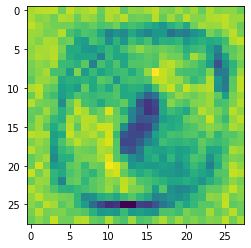

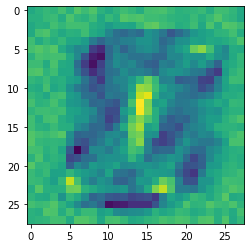

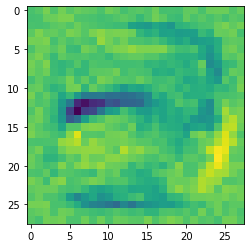

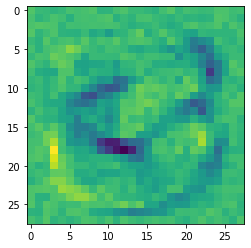

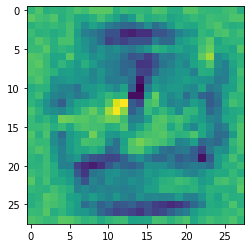

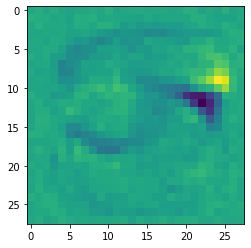

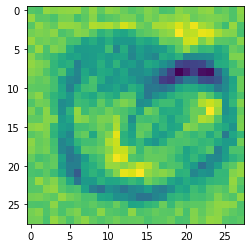

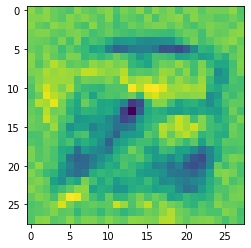

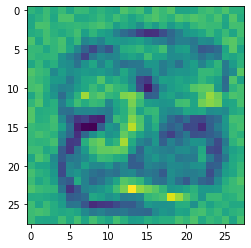

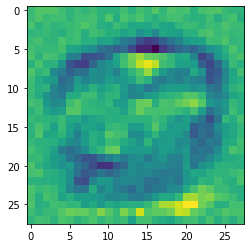

In [0]:
import pylab
for i in range(10):
    pylab.figure();
    pylab.imshow(net[0].weight.data[i].view(28,28))